In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("developer_dataset.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Dataframe visualisation and description

Dataframe contains survey responses by developers all over the world for last few years. 

In [3]:
df.head()

,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


In [4]:
delimiter = 80*'-'
print('Dataframe columns are:')
print(delimiter)
print(df.columns)

Dataframe columns are:
--------------------------------------------------------------------------------
Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')


In [5]:
print('Basic statistical information about dataframe')
print(delimiter)
print(df.describe())

Basic statistical information about dataframe
--------------------------------------------------------------------------------
        RespondentID           Year  YearsCodePro  ConvertedComp   WorkWeekHrs
count  111209.000000  111209.000000  94793.000000   9.133300e+04  51089.000000
mean    19262.039709    2018.854832      9.547045   1.251777e+05     41.051670
std     11767.011322       0.777503      7.548931   2.461218e+05     13.833929
min         1.000000    2018.000000      0.000000   0.000000e+00      1.000000
25%      9268.000000    2018.000000      4.000000   4.600000e+04     40.000000
50%     18535.000000    2019.000000      8.000000   7.900000e+04     40.000000
75%     28347.000000    2019.000000     14.000000   1.200000e+05     42.000000
max     42857.000000    2020.000000     50.000000   2.000000e+06    475.000000


# Data Analysis

## Searching for NA values accross whole dataset

In [9]:
print('Number of rows non-NA values per each columns:')
print(delimiter)
non_na_overview = df.count()
non_na_overview_df = pd.DataFrame({'Column':non_na_overview.index, 'Count_non-NA':non_na_overview.values})
non_na_overview_df 

Number of rows non-NA values per each columns:
--------------------------------------------------------------------------------


,Column,Count_non-NA
0,RespondentID,111209
1,Year,111209
2,Country,111209
3,Employment,109425
4,UndergradMajor,98453
5,DevType,100433
6,LanguageWorkedWith,102018
7,LanguageDesireNextYear,96044
8,DatabaseWorkedWith,85859
9,DatabaseDesireNextYear,74234


In [10]:
print('Number of NA values for each columns:')
print(delimiter)
na_oveview = df.isna().sum()
na_oveview_df = pd.DataFrame({'Column':na_oveview.index, 'Count_NA':na_oveview.values})
na_oveview_df

Number of NA values for each columns:
--------------------------------------------------------------------------------


,Column,Count_NA
0,RespondentID,0
1,Year,0
2,Country,0
3,Employment,1784
4,UndergradMajor,12756
5,DevType,10776
6,LanguageWorkedWith,9191
7,LanguageDesireNextYear,15165
8,DatabaseWorkedWith,25350
9,DatabaseDesireNextYear,36975


### Percentage of NA values per columns

In [11]:
df_na_values = non_na_overview_df.merge(na_oveview_df)
df_na_values['NA_Percentage'] = df_na_values['Count_NA']/df_na_values.loc[0,'Count_non-NA']
df_na_values

,Column,Count_non-NA,Count_NA,NA_Percentage
0,RespondentID,111209,0,0.000000
1,Year,111209,0,0.000000
2,Country,111209,0,0.000000
3,Employment,109425,1784,0.016042
4,UndergradMajor,98453,12756,0.114703
5,DevType,100433,10776,0.096899
6,LanguageWorkedWith,102018,9191,0.082646
7,LanguageDesireNextYear,96044,15165,0.136365
8,DatabaseWorkedWith,85859,25350,0.227949
9,DatabaseDesireNextYear,74234,36975,0.332482


Columns NEWJobHunt, NEWJobHuntResearch, NEWLear contain in average 80% of nan values. Those columns can be removed. 

In [110]:
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'],
    axis=1,
    inplace=True)

## Number of Developers per Country 

In [12]:
developers_per_country = (
df[['RespondentID', 'Year', 'Country']].groupby(["Year", "Country"]).count().reset_index()
)
developers_per_country

,Year,Country,RespondentID
0,2018,Canada,3393
1,2018,China,1037
2,2018,France,2572
3,2018,Germany,6459
4,2018,Japan,361
5,2018,Mexico,736
6,2018,Spain,1769
7,2018,United Kingdom,6221
8,2018,United States,20309
9,2019,Canada,3395


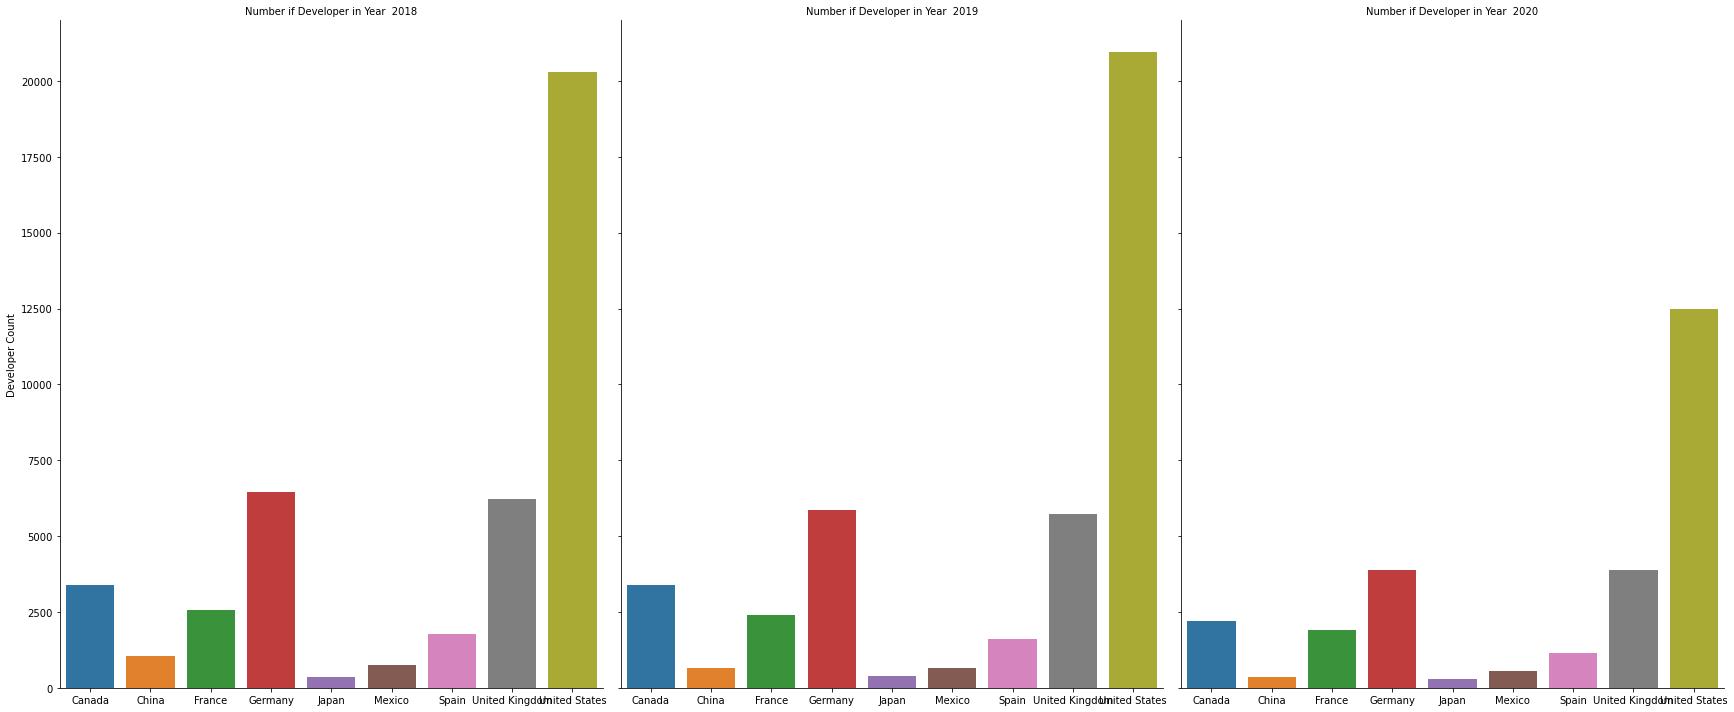

In [113]:
dev_count_plot = sns.catplot(data = developers_per_country, x = 'Country', y ='RespondentID', \
                             orient = "v", \
                             col = 'Year', \
                             kind = "bar", \
                             height=10, \
                             aspect = 0.8)
dev_count_plot.set_titles("Number if Developer in {col_var}  {col_name}")
dev_count_plot.set_axis_labels("", "Developer Count");

## Number of NA values in colums of Employment and Developer Type

In [114]:
df_na_per_country = df[['Employment', 'DevType']].isnull().groupby(df['Country']).sum().reset_index()
df_na_per_country

,Country,Employment,DevType
0,Canada,148,944
1,China,139,491
2,France,104,848
3,Germany,386,1691
4,Japan,13,109
5,Mexico,25,207
6,Spain,74,434
7,United Kingdom,196,1472
8,United States,699,4580


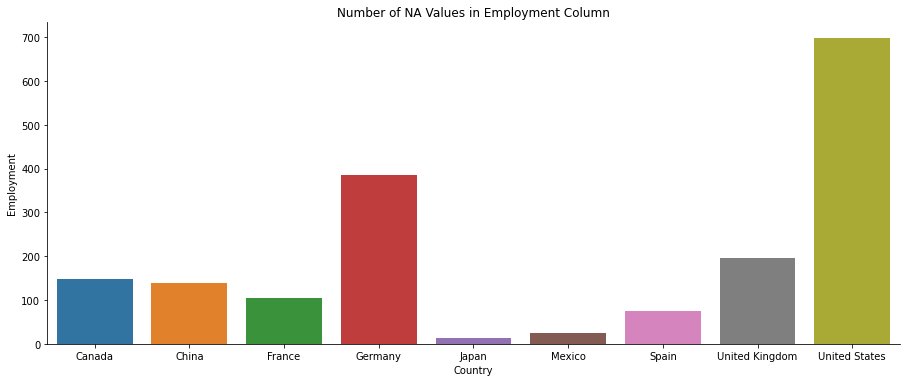

In [115]:
na_employment_plot = sns.catplot(data = df_na_per_country, x = "Country", y = "Employment", \
                                 kind = "bar",\
                                 height = 5, aspect = 2.5)

na_employment_plot.set(title = "Number of NA Values in Employment Column");

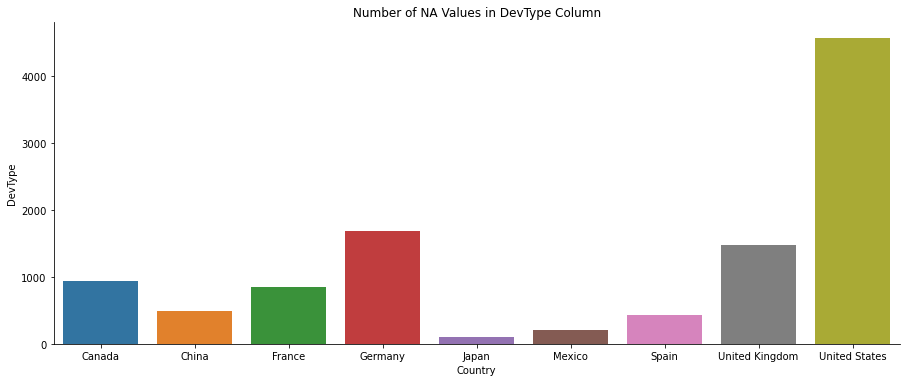

In [116]:
na_devtype_plot = sns.catplot(data = df_na_per_country, x = "Country", y = "DevType", kind = "bar" \
           ,height = 5, aspect = 2.5);
na_devtype_plot.set(title = "Number of NA Values in DevType Column");


The values showing the number of NAN values in both columns  `DevType` and `Employment` are scaled with the number of the developers in every single country and both columns contain NAN values with very similar distribution. 

Percentage of NAN values in both columns is less than 1%. I assume that those data are missing completely at random and those columns can be deleted without making the analysis invalid. 

## Number of developers in each expert domain per country

In [117]:
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

By usage of `loc` and `Series.str.contains()` function a specific string is searched while itterating through rows in column.  True label is assigned to each row if string occurence is encountered and boolean value is saved into a new column. Data are later reshaped by `pd.melt` function.

In [118]:
devdf = df[['Country','DevType']]
devdf
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [119]:
devdf_melt = pd.melt(frame = devdf, id_vars = ["Country"], value_vars = ["BackEnd", "FrontEnd", "FullStack", "Mobile", "Admin"],
                    value_name = "DevFlag", var_name = "DevCategory")

All NA values for each developer category can be dropped. 

In [121]:
devdf_melt.dropna(inplace = True)

In [141]:
devdf_plot = devdf_melt.groupby(["Country", "DevCategory"]).sum("DevFlag").sort_values("Country").reset_index()
devdf_plot

,Country,DevCategory,DevFlag
0,Canada,Admin,1481
1,Canada,BackEnd,2375
2,Canada,FrontEnd,1594
3,Canada,FullStack,2656
4,Canada,Mobile,712
5,China,Admin,172
6,China,BackEnd,383
7,China,FrontEnd,229
8,China,FullStack,276
9,China,Mobile,144


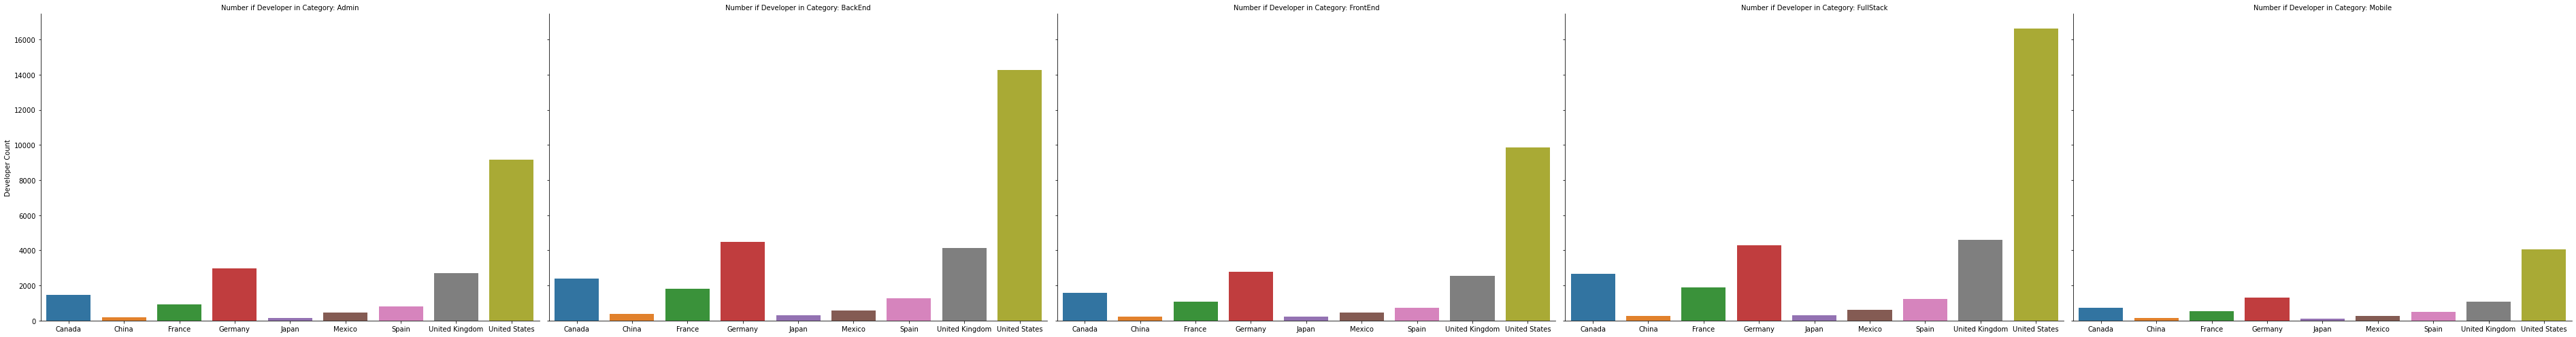

In [142]:
dev_cat_per_country_plot = sns.catplot(data = devdf_plot, x= "Country", y="DevFlag", col = "DevCategory" \
                                   ,kind = "bar" \
                                   ,height = 7 \
                                   ,aspect = 1.5)
dev_cat_per_country_plot.set_titles("Number if Developer in Category: {col_name}")
dev_cat_per_country_plot.set_axis_labels("", "Developer Count");

Most of developers can excel in domain of Front-End, Back-End and Full-Stack. 

## Number of developers in employment category per country

In [159]:
df_empl = df[["Country", "Employment"]]
df_empl["Employment"].value_counts()

Employed full-time                                      81176
Independent contractor, freelancer, or self-employed     8240
Employed part-time                                       4818
Not employed, but looking for work                       4006
Not employed, and not looking for work                   1620
Retired                                                   115
Name: Employment, dtype: int64

In [160]:
df_empl.loc[df["Employment"].str.contains('Employed full-time'), 'Employed_Full_Time'] = True
df_empl.loc[df["Employment"].str.contains('contractor'), 'Contractor_Freelancer'] = True
df_empl.loc[df["Employment"].str.contains('Employed part-time'), 'Employed_Part_Time'] = True
df_empl.loc[df["Employment"].str.contains('Not employed, but looking'), 'Not employed but seeking'] = True
df_empl.loc[df["Employment"].str.contains('Not employed, and not looking'), 'Not employed and not seeking'] = True
df_empl.loc[df["Employment"].str.contains('Retired'), 'Retired'] = True
df_empl

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Country,Employment,Employed_Full_Time,Contractor_Freelancer,Employed_Part_Time,Not employed but seeking,Not employed and not seeking,Retired
0,United States,Employed full-time,True,NaN,NaN,NaN,NaN,NaN
1,United States,Employed full-time,True,NaN,NaN,NaN,NaN,NaN
3,United States,Employed full-time,True,NaN,NaN,NaN,NaN,NaN
4,United States,Employed full-time,True,NaN,NaN,NaN,NaN,NaN
5,United States,Employed full-time,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
111187,Japan,"Independent contractor, freelancer, or self-em...",NaN,True,NaN,NaN,NaN,NaN
111188,Japan,"Not employed, but looking for work",NaN,NaN,NaN,True,NaN,NaN
111190,Japan,"Independent contractor, freelancer, or self-em...",NaN,True,NaN,NaN,NaN,NaN
111191,Japan,"Not employed, and not looking for work",NaN,NaN,NaN,NaN,True,NaN


In [175]:
df_empl_melt = pd.melt(frame = df_empl, id_vars = ["Country"],\
                       value_vars = ["Employed_Full_Time", "Contractor_Freelancer", "Employed_Part_Time", "Not employed but seeking", "Not employed and not seeking", "Retired"],\
                       value_name = "EmploymentFlag",\
                       var_name = "Employment_Category")
df_empl_melt.dropna(inplace = True)
df_empl_plot = df_empl_melt[["Country","Employment_Category", "EmploymentFlag"]].groupby(["Country", "Employment_Category"]).sum("EmploymentFlag").reset_index()
df_empl_plot

,Country,Employment_Category,EmploymentFlag
0,Canada,Contractor_Freelancer,761
1,Canada,Employed_Full_Time,6305
2,Canada,Employed_Part_Time,333
3,Canada,Not employed and not seeking,164
4,Canada,Not employed but seeking,425
5,Canada,Retired,5
6,China,Contractor_Freelancer,99
7,China,Employed_Full_Time,1218
8,China,Employed_Part_Time,61
9,China,Not employed and not seeking,65


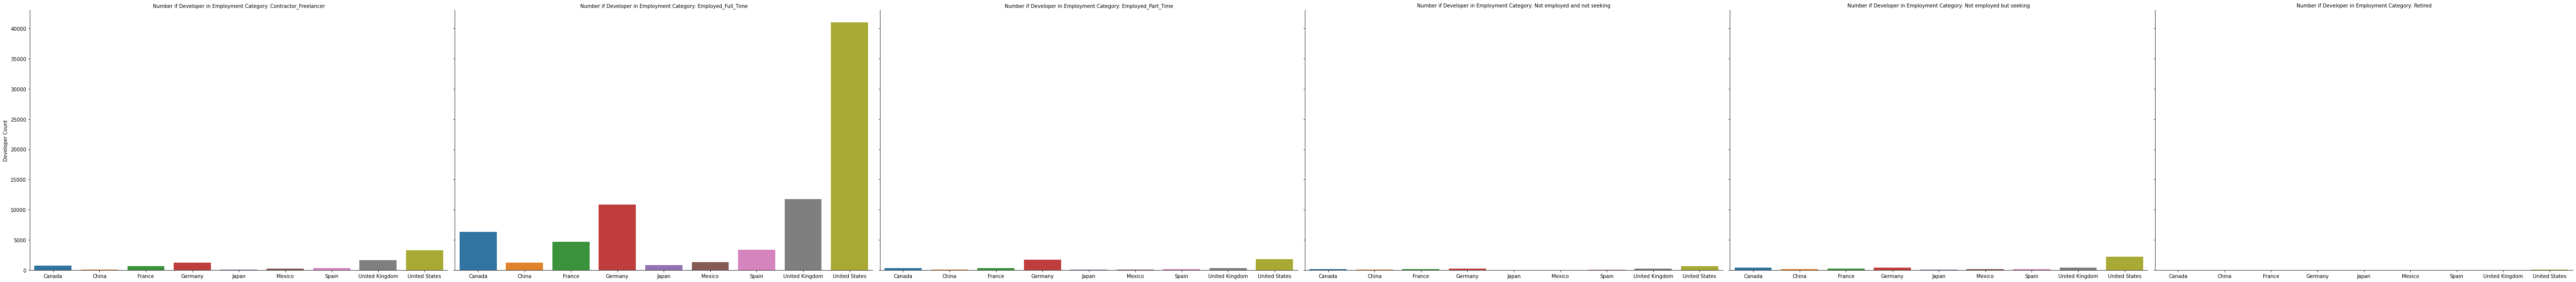

In [191]:
empl_cat_plot = sns.catplot(data = df_empl_plot, x= "Country", y = "EmploymentFlag", col = "Employment_Category", \
                           kind = "bar", \
                           height = 8.0, \
                           aspect = 1.5)
empl_cat_plot.set_titles("Number if Developer in Employment Category: {col_name}")
empl_cat_plot.set_axis_labels("", "Developer Count");

Majority of developers are employed full-time or work as contractors/freelancers.

## Developer undergraduate majors

In [193]:
df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   55339
Information systems, information technology, or system administration              5408
Another engineering discipline (ex. civil, electrical, mechanical)                 5136
Mathematics or statistics                                                          4046
A natural science (ex. biology, chemistry, physics)                                3752
Web development or web design                                                      2819
A humanities discipline (ex. literature, history, philosophy)                      2147
A social science (ex. anthropology, psychology, political science)                 1892
A business discipline (ex. accounting, finance, marketing)                         1808
Fine arts or performing arts (ex. graphic design, music, studio art)               1744
Another engineering discipline (such as civil, electrical, mechanical, etc.)       1574
A natural science (such as biolo

In [ ]:
df_undergrad = df[["Country","Year","UndergradMajor"]]
df_undergrad[["UndergradMajor"]].isnull().groupby(df_undergrad["Year"]).sum().plot.bar(color = 'purple', edgecolor = 'black')
plt.title("Number of NA value in UndergradMajor Column")
plt.show();

Value of Undergrad Majors are missing mainly for year 2018 and 2019. It indicates that all candidates have decision for their educational backgroud. 

`Back Filling` method can be used to add values to blanks in the UndergradMajor column. Method is also called "Next Observation Carried Backward".

In [213]:
df = df.sort_values(["RespondentID", "Year"])

In [215]:
df['UndergradMajor'].bfill(axis=0, inplace=True)

In [223]:
edudf = df[["Year","UndergradMajor"]]
edudf

,Year,UndergradMajor
0,2018,"Computer science, computer engineering, or sof..."
1,2019,"Computer science, computer engineering, or sof..."
3,2018,"Computer science, computer engineering, or sof..."
4,2019,"Computer science, computer engineering, or sof..."
5,2020,"Computer science, computer engineering, or sof..."
...,...,...
111187,2018,"Computer science, computer engineering, or sof..."
111188,2018,"Computer science, computer engineering, or sof..."
111190,2018,"A humanities discipline (ex. literature, histo..."
111191,2018,NaN


Six categories of major have been identified and strings in the `UndergradMAjor` column have been manipulated to get better information about the category of educational background. `pd.melt` helped to reshape the data.

In [224]:
majors = ['social science', 'natural science', 'computer science', 'development', 'another engineering', 'never declared']


In [225]:
edudf.dropna(inplace = True)

<ipython-input-225-22cfe1d247a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(inplace = True)


In [226]:
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [227]:
edudf

,Year,UndergradMajor,SocialScience,NaturalScience,ComSci,OtherEng,NoMajor
0,2018,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
1,2019,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
3,2018,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
4,2019,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
5,2020,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
...,...,...,...,...,...,...,...
111185,2018,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
111186,2018,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
111187,2018,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
111188,2018,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN


In [228]:
edudf.head()

,Year,UndergradMajor,SocialScience,NaturalScience,ComSci,OtherEng,NoMajor
0,2018,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
1,2019,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
3,2018,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
4,2019,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN
5,2020,"Computer science, computer engineering, or sof...",NaN,NaN,True,NaN,NaN


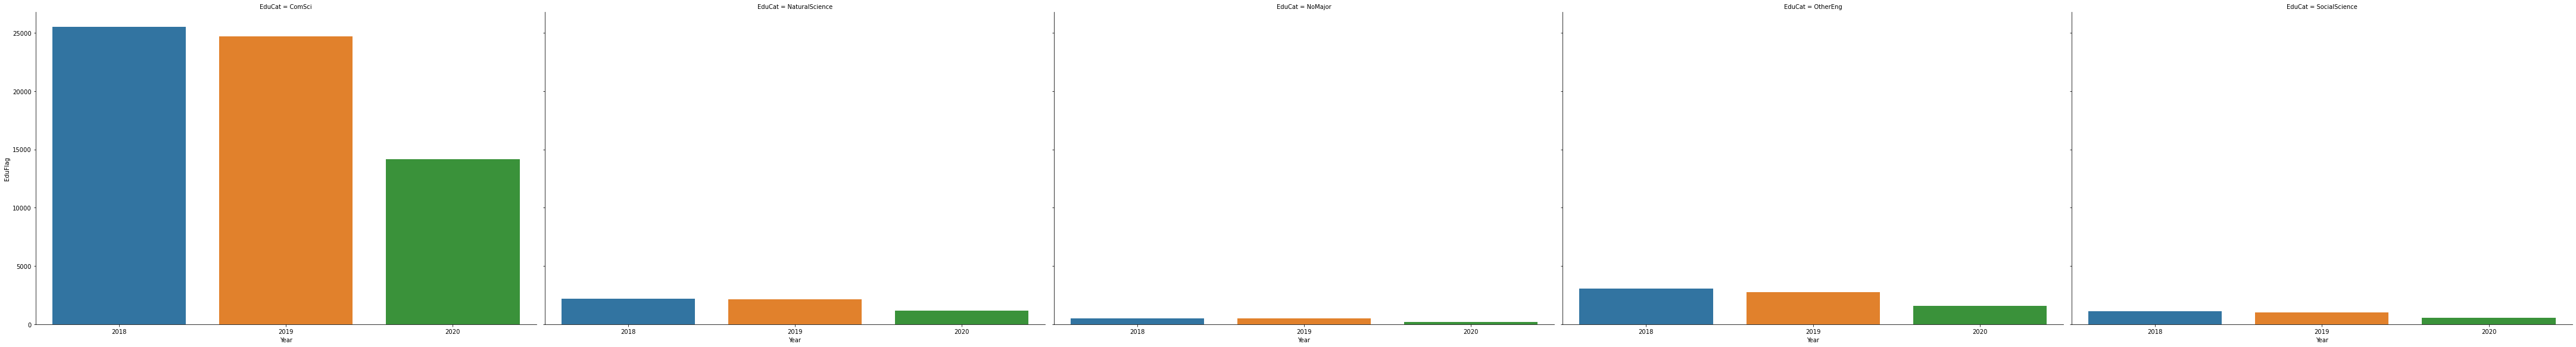

In [250]:
edudf_melt = pd.melt(frame = edudf, id_vars = ["Year", "UndergradMajor"], value_vars =["SocialScience", "NaturalScience", "ComSci", "OtherEng", "NoMajor"],\
                    value_name = "EduFlag", var_name = "EduCat")
edudf_melt.dropna(inplace = True)
edudf_melt = edudf_melt[["Year", "EduCat", "EduFlag"]].groupby(["Year", "EduCat"]).sum("EduFlag").reset_index()
edudf_melt
edudf_plot = sns.catplot(data = edudf_melt, x = "Year", y = "EduFlag", col = "EduCat", kind = "bar",\
                        height = 8, aspect = 1.5)

Majority of candidates have backgroud in computer science. 

In [252]:
df.isna().sum()

RespondentID                  0
Year                          0
Country                       0
Employment                    0
UndergradMajor                2
DevType                       0
LanguageWorkedWith         6461
LanguageDesireNextYear    11874
DatabaseWorkedWith        19734
DatabaseDesireNextYear    30629
PlatformWorkedWith        15723
PlatformDesireNextYear    21422
Hobbyist                  40045
OrgSize                   46126
YearsCodePro              13423
JobSeek                   43024
ConvertedComp             16659
WorkWeekHrs               49683
dtype: int64

## Relationship between years of experience and compensation

In [259]:
years_comp_df = df[["Year","YearsCodePro", "ConvertedComp"]]

In [260]:
print('Number of NA Values is: ')
print(delimiter)
years_comp_df.isna().sum()

Number of NA Values is: 
--------------------------------------------------------------------------------


Year                 0
YearsCodePro     13423
ConvertedComp    16659
dtype: int64

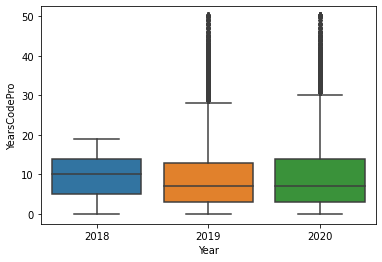

In [262]:
sns.boxplot(data = years_comp_df, x = "Year", y="YearsCodePro" );

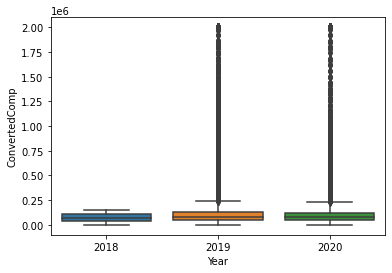

In [263]:
sns.boxplot(data = years_comp_df, x = "Year", y="ConvertedComp" );

Data distribution is more or less similar for each year.The relationship between years of experience and compensation can be studied after filling blanks by `multiple imputation method`. 

In [266]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

imputedf = df[['YearsCodePro','ConvertedComp']]
 
traindf, testdf = train_test_split(imputedf, train_size=0.1)
 
# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=20, random_state=0)
 
# Fit the model to the the test dataset
imp.fit(testdf)
 
# Transform the model on the entire dataset
compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

Dataframe is splitted on the train set and test set in relationship 10% to 90%.
Iterative imputer runs in 20 iterations and is fitted to test dataset. 

In [268]:
compdf.isna().sum()

YearsCodePro     0
ConvertedComp    0
dtype: int64

In [272]:
compdf.shape

(99975, 2)

Outliners of compensation column > 150000 can be dropped. 

In [270]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]

In [271]:
compPlotdf

,YearsCodePro,ConvertedComp
0,10.0,141000.0
1,1.0,61000.0
2,4.0,48000.0
3,8.0,90000.0
4,13.0,116000.0
...,...,...
99970,9.0,93000.0
99971,9.0,116000.0
99972,9.0,8000.0
99973,9.0,71000.0


Data are splitted into 5 quantiles according to values for years of experience.

In [275]:
compPlotdf['YearCodeProBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

<ipython-input-275-b2d8fe2977d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['YearCodeProBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


For each bin of years of experience the box plot for the compensation data is plotted. 

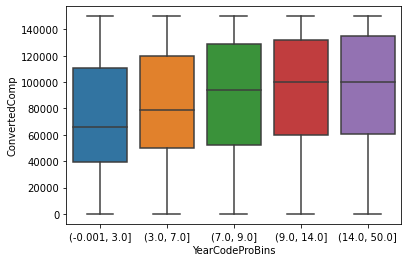

In [279]:
sns.boxplot(data = compPlotdf, x = "YearCodeProBins", y = "ConvertedComp");

Average compenstation increases with the years of experience. 

Box plot graphs below show that there is a clear correlation between compensation and year of experience. 
More experienced developers are expected to achieve higher average salary than junior developers.

